## 5.1. Работа с временными рядами в Pandas


### Введение

Временные ряды - это последовательность точек данных, измеренных в последовательные временные интервалы. Работа с временными рядами широко используется в финансах, экономике, и многих других областях. В этом учебнике мы рассмотрим, как обрабатывать и анализировать временные ряды с использованием библиотеки Pandas в Python. В качестве примера мы будем использовать данные о котировках криптовалюты Bitcoin.



In [ ]:
!pip install matplotlib

In [ ]:
!pip install statsmodels

In [40]:
# Импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


### Загрузка данных

Давайте начнем с загрузки нашего набора данных. Мы будем использовать данные о котировках криптовалюты Bitcoin, которые содержат информацию о ценах открытия, закрытия, максимальных и минимальных значениях.


In [41]:
# Загрузка данных в DataFrame
df = pd.read_csv('crypto_dataset/BTC.csv')

# Просмотр первых нескольких строк данных
df.head()


,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921


### Обработка даты

Важной частью работы с временными рядами является обработка дат. Нам нужно убедиться, что даты представлены в правильном формате и используются в качестве индекса нашего DataFrame.


In [42]:
# Преобразование столбца 'date' в формат datetime
df['date'] = pd.to_datetime(df['date'])

# Удалим столбец 'ticker', чтобы избежать проблем с обработкой текстовых значений
df = df.drop(columns=['ticker'])

# Оставим данные после 2017 года для большей наглядности
df = df[df['date'] > '2018-01-01']

# Установка столбца 'date' в качестве индекса
df.set_index('date', inplace=True)
df.head()


,open,high,low,close
date,,,,
2018-01-02,13444.9,15306.1,12934.2,14754.1
2018-01-03,14754.1,15435.0,14579.7,15156.6
2018-01-04,15156.5,15408.7,14244.7,15180.1
2018-01-05,15180.1,17126.9,14832.4,16954.8
2018-01-06,16954.8,17252.8,16286.6,17172.3


### Ресемплирование данных

Ресемплирование данных позволяет агрегировать данные по различным временным интервалам. Это может быть полезно для анализа трендов на различных временных горизонтах.


In [43]:
# Ресемплирование данных по неделям
weekly_data = df.resample('W').mean()

# Просмотр ресемплированных данных
weekly_data.head()


,open,high,low,close
date,,,,
2018-01-07,15444.150000,16285.716667,14778.116667,15907.683333
2018-01-14,14569.485714,14961.785714,13444.914286,14199.314286
2018-01-21,12171.314286,12765.442857,10966.868571,11872.614286
2018-01-28,11166.900000,11703.457143,10575.285714,11203.528571
2018-02-04,10040.994286,10273.740000,9041.988571,9562.335714


### Визуализация данных

Визуализация временных рядов может помочь нам лучше понять тренды и паттерны в данных. Давайте визуализируем цены закрытия нашего набора данных.


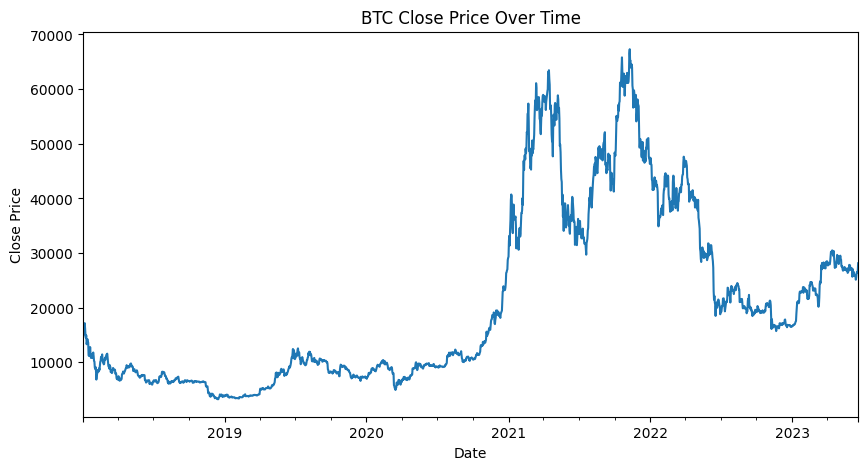

In [44]:
# Визуализация цен закрытия
df['close'].plot(figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC Close Price Over Time')
plt.show()


### Скользящие средние

Скользящие средние используются для сглаживания временных рядов, чтобы лучше выявить тренды. Давайте рассчитаем 7-дневное скользящее среднее цены закрытия.


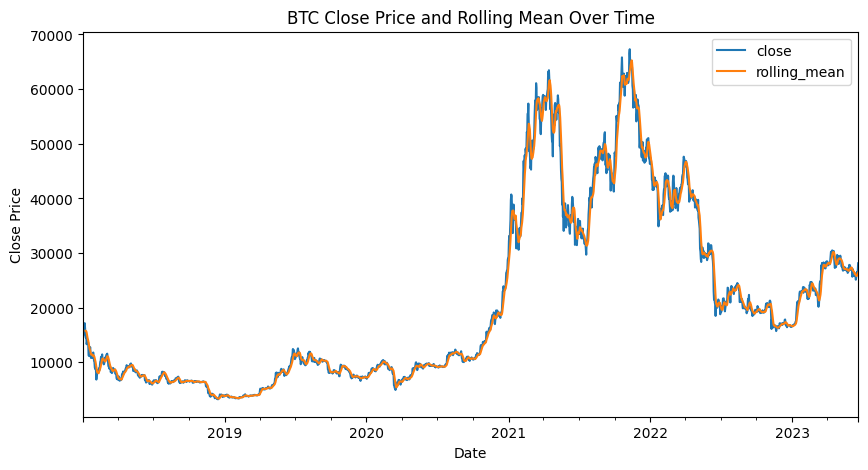

In [45]:
# Расчет 7-дневного скользящего среднего
df['rolling_mean'] = df['close'].rolling(window=7).mean()

# Визуализация цен закрытия и скользящего среднего
df[['close', 'rolling_mean']].plot(figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC Close Price and Rolling Mean Over Time')
plt.show()


### Тренды и сезонность

Мы можем разложить наш временной ряд на несколько составляющих, включая тренд и сезонность, чтобы лучше понять структуру наших данных.


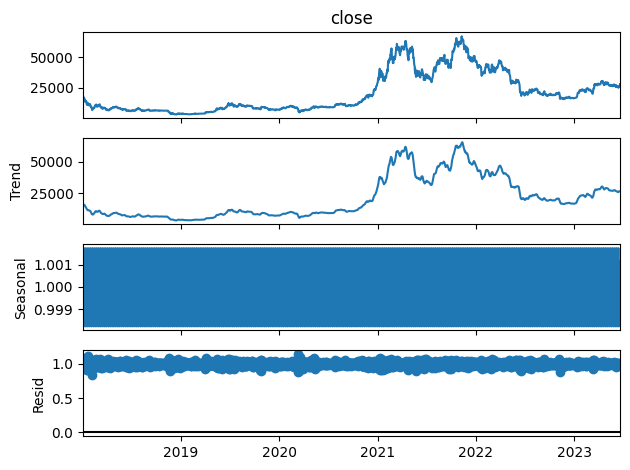

In [46]:
# Декомпозиция данных на тренд, сезонность и остаток
decomposition = seasonal_decompose(df['close'], model='multiplicative')

# Визуализация составляющих
decomposition.plot()
plt.show()


### Прогнозирование временных рядов

Прогнозирование временных рядов - это способ предсказать будущие значения на основе прошлых данных. Существует множество методов прогнозирования временных рядов, таких как ARIMA, экспоненциальное сглаживание и многое другое. В этом учебном пособии мы не будем подробно рассматривать модели прогнозирования.
